# Getting Emissions and Weather Data Needed 
Date: 2022-07-05

## Retrieve Current Emissions from CAISO 

### Try pyiso API

`pyiso` is currently not working for me. Seems like `get_generation(latest = True)` returns a blank, and this is what I need most! 

In [4]:
from pyiso import client_factory

In [14]:
caiso = client_factory('CAISO')

In [15]:
caiso.get_generation(latest = True)

[]

### Method 1: Just try getting direct URL from CAISO website

I get the URL from going to the [CAISO website](https://www.caiso.com/TodaysOutlook/Pages/supply.html#section-supply-trend) and getting the `href` of the Supply data. 

In [5]:
import pandas as pd
import urllib.parse
from io import StringIO

This fails, says file path is too long: 

In [26]:
#data = pd.read_csv('data:text/csv;charset=utf8,Supply%2007%2F05%2F2022%2C0%3A00%2C0%3A05%2C0%3A10%2C0%3A15%2C0%3A20%2C0%3A25%2C0%3A30%2C0%3A35%2C0%3A40%2C0%3A45%2C0%3A50%2C0%3A55%2C1%3A00%2C1%3A05%2C1%3A10%2C1%3A15%2C1%3A20%2C1%3A25%2C1%3A30%2C1%3A35%2C1%3A40%2C1%3A45%2C1%3A50%2C1%3A55%2C2%3A00%2C2%3A05%2C2%3A10%2C2%3A15%2C2%3A20%2C2%3A25%2C2%3A30%2C2%3A35%2C2%3A40%2C2%3A45%2C2%3A50%2C2%3A55%2C3%3A00%2C3%3A05%2C3%3A10%2C3%3A15%2C3%3A20%2C3%3A25%2C3%3A30%2C3%3A35%2C3%3A40%2C3%3A45%2C3%3A50%2C3%3A55%2C4%3A00%2C4%3A05%2C4%3A10%2C4%3A15%2C4%3A20%2C4%3A25%2C4%3A30%2C4%3A35%2C4%3A40%2C4%3A45%2C4%3A50%2C4%3A55%2C5%3A00%2C5%3A05%2C5%3A10%2C5%3A15%2C5%3A20%2C5%3A25%2C5%3A30%2C5%3A35%2C5%3A40%2C5%3A45%2C5%3A50%2C5%3A55%2C6%3A00%2C6%3A05%2C6%3A10%2C6%3A15%2C6%3A20%2C6%3A25%2C6%3A30%2C6%3A35%2C6%3A40%2C6%3A45%2C6%3A50%2C6%3A55%2C7%3A00%2C7%3A05%2C7%3A10%2C7%3A15%2C7%3A20%2C7%3A25%2C7%3A30%2C7%3A35%2C7%3A40%2C7%3A45%2C7%3A50%2C7%3A55%2C8%3A00%2C8%3A05%2C8%3A10%2C8%3A15%2C8%3A20%2C8%3A25%2C8%3A30%2C8%3A35%2C8%3A40%2C8%3A45%2C8%3A50%2C8%3A55%2C9%3A00%2C9%3A05%2C9%3A10%2C9%3A15%2C9%3A20%2C9%3A25%2C9%3A30%2C9%3A35%2C9%3A40%2C9%3A45%2C9%3A50%2C9%3A55%2C10%3A00%2C10%3A05%2C10%3A10%2C10%3A15%2C10%3A20%2C10%3A25%2C10%3A30%2C10%3A35%2C10%3A40%2C10%3A45%2C10%3A50%2C10%3A55%2C11%3A00%2C11%3A05%2C11%3A10%2C11%3A15%2C11%3A20%2C11%3A25%2C11%3A30%2C11%3A35%2C11%3A40%2C%0ARenewables%2C6177%2C6156%2C6151%2C6140%2C6120%2C6084%2C6053%2C5998%2C5974%2C5937%2C5893%2C5864%2C5815%2C5761%2C5742%2C5732%2C5697%2C5606%2C5546%2C5506%2C5478%2C5446%2C5436%2C5438%2C5459%2C5488%2C5502%2C5512%2C5532%2C5545%2C5549%2C5542%2C5558%2C5544%2C5519%2C5506%2C5511%2C5538%2C5566%2C5576%2C5593%2C5593%2C5606%2C5620%2C5649%2C5663%2C5690%2C5693%2C5699%2C5725%2C5710%2C5698%2C5680%2C5668%2C5655%2C5613%2C5572%2C5544%2C5528%2C5512%2C5502%2C5493%2C5478%2C5426%2C5410%2C5377%2C5335%2C5309%2C5297%2C5301%2C5294%2C5335%2C5417%2C5544%2C5742%2C5959%2C6200%2C6463%2C6803%2C7185%2C7687%2C8156%2C8573%2C9001%2C9530%2C10110%2C10632%2C11103%2C11562%2C12230%2C12756%2C13310%2C13712%2C14286%2C14720%2C14879%2C15070%2C15180%2C15488%2C15707%2C15929%2C16121%2C16309%2C16434%2C16571%2C16672%2C16822%2C16944%2C16946%2C17065%2C17228%2C17251%2C17255%2C17246%2C17223%2C17214%2C17299%2C17284%2C17331%2C17402%2C17558%2C17713%2C17802%2C17867%2C17863%2C17861%2C17839%2C17858%2C17882%2C17843%2C17807%2C17854%2C17843%2C17854%2C17854%2C17846%2C17823%2C17800%2C17877%2C18041%2C18039%2C%0ANatural%20gas%2C6375%2C6530%2C6314%2C6333%2C6429%2C6373%2C6362%2C6314%2C6272%2C6297%2C6231%2C6099%2C5991%2C5796%2C5669%2C5634%2C5546%2C5510%2C5483%2C5342%2C5286%2C5220%2C5237%2C5333%2C5321%2C5432%2C5421%2C5322%2C5280%2C5308%2C5334%2C5303%2C5202%2C5200%2C5168%2C5086%2C4944%2C5239%2C5565%2C5486%2C5461%2C5527%2C5536%2C5523%2C5518%2C5519%2C5517%2C5567%2C5492%2C5409%2C5523%2C5477%2C5488%2C5537%2C5548%2C5587%2C5582%2C5581%2C5606%2C5573%2C5580%2C5593%2C5444%2C5475%2C5520%2C5539%2C5536%2C5594%2C5651%2C5726%2C5754%2C5798%2C5952%2C6126%2C6056%2C6023%2C6050%2C5978%2C5974%2C6013%2C5970%2C5982%2C6104%2C5910%2C5676%2C5291%2C4916%2C4865%2C4929%2C4920%2C4950%2C5010%2C5107%2C5170%2C5241%2C5586%2C5629%2C5388%2C5086%2C5117%2C5366%2C5518%2C5570%2C5588%2C5516%2C5500%2C5406%2C5490%2C5470%2C5365%2C5603%2C5695%2C5627%2C5580%2C5588%2C5457%2C5453%2C5530%2C5496%2C5697%2C5764%2C5671%2C5596%2C5568%2C5548%2C5364%2C5186%2C5247%2C5255%2C5322%2C5276%2C5157%2C5179%2C5215%2C5364%2C5337%2C5235%2C5207%2C5120%2C5301%2C5195%0ALarge%20hydro%2C2030%2C2089%2C2167%2C2109%2C2106%2C2111%2C2105%2C2110%2C2113%2C2106%2C2121%2C2125%2C2121%2C2129%2C2121%2C2109%2C2095%2C2100%2C2098%2C2048%2C2066%2C1994%2C1936%2C1944%2C1943%2C1928%2C1910%2C1900%2C1897%2C1897%2C1893%2C1903%2C1900%2C1887%2C1846%2C1845%2C1831%2C1745%2C1705%2C1695%2C1696%2C1696%2C1701%2C1700%2C1695%2C1697%2C1698%2C1689%2C1690%2C1731%2C1750%2C1748%2C1738%2C1736%2C1732%2C1739%2C1741%2C1747%2C1742%2C1748%2C1817%2C2112%2C2236%2C2238%2C2236%2C2231%2C2233%2C2239%2C2231%2C2233%2C2232%2C2218%2C2238%2C2365%2C2474%2C2502%2C2507%2C2488%2C2476%2C2488%2C2493%2C2487%2C2499%2C2443%2C2276%2C1770%2C1463%2C1480%2C1516%2C1501%2C1465%2C1444%2C1445%2C1414%2C1409%2C1440%2C1415%2C1293%2C1219%2C1206%2C1204%2C1208%2C1209%2C1227%2C1235%2C1236%2C1235%2C1236%2C1236%2C1222%2C1211%2C1204%2C1195%2C1209%2C1212%2C1211%2C1211%2C1216%2C1219%2C1217%2C1209%2C1218%2C1221%2C1217%2C1204%2C1193%2C1192%2C1197%2C1201%2C1206%2C1203%2C1198%2C1212%2C1165%2C1113%2C1070%2C1068%2C1074%2C1075%2C1073%2C1075%0AImports%2C8935%2C8729%2C8646%2C8663%2C8640%2C8636%2C8624%2C8625%2C8633%2C8492%2C8464%2C8487%2C8506%2C8554%2C8679%2C8614%2C8643%2C8773%2C8684%2C8715%2C8697%2C8739%2C8755%2C8674%2C8621%2C8568%2C8552%2C8615%2C8687%2C8684%2C8614%2C8593%2C8538%2C8522%2C8526%2C8473%2C8435%2C8611%2C8598%2C8644%2C8637%2C8612%2C8559%2C8543%2C8494%2C8460%2C8468%2C8501%2C8478%2C8398%2C8256%2C8209%2C8305%2C8360%2C8404%2C8543%2C8696%2C8719%2C8701%2C8689%2C8630%2C8505%2C8574%2C8625%2C8684%2C8757%2C8840%2C8885%2C8966%2C8930%2C8978%2C8920%2C8465%2C7894%2C7518%2C7228%2C7068%2C6969%2C6960%2C6859%2C6629%2C6463%2C6259%2C6153%2C6043%2C6354%2C6321%2C6085%2C5814%2C5527%2C5365%2C5076%2C4773%2C4503%2C4287%2C4189%2C3820%2C4308%2C4322%2C4219%2C4279%2C4192%2C3964%2C3805%2C3601%2C3546%2C3364%2C3391%2C3294%2C3417%2C3443%2C3438%2C3381%2C3310%2C3216%2C3184%2C3145%2C3128%2C3114%2C3164%2C3106%2C3006%2C2923%2C2823%2C2642%2C2407%2C2339%2C2235%2C2348%2C2327%2C2292%2C2196%2C2263%2C2472%2C2375%2C2329%2C2297%2C2312%2C2491%2C2398%2C2243%0ABatteries%2C112%2C334%2C420%2C203%2C161%2C59%2C30%2C-41%2C-63%2C-47%2C-51%2C-40%2C-26%2C52%2C54%2C95%2C33%2C-12%2C32%2C72%2C76%2C43%2C35%2C25%2C-27%2C-53%2C-26%2C-83%2C-151%2C-204%2C-214%2C-217%2C-180%2C-192%2C-192%2C-98%2C-23%2C-347%2C-385%2C-371%2C-436%2C-449%2C-451%2C-451%2C-450%2C-451%2C-476%2C-493%2C-373%2C-329%2C-215%2C-149%2C-253%2C-270%2C-271%2C-353%2C-373%2C-362%2C-336%2C-255%2C-170%2C-161%2C-116%2C-83%2C-115%2C-98%2C-81%2C-77%2C-111%2C-155%2C-192%2C-143%2C150%2C513%2C716%2C792%2C733%2C597%2C390%2C205%2C152%2C-30%2C-176%2C-166%2C-132%2C39%2C356%2C191%2C149%2C-5%2C-159%2C-236%2C-373%2C-516%2C-667%2C-825%2C-781%2C-850%2C-695%2C-855%2C-1113%2C-1207%2C-1207%2C-1211%2C-1134%2C-1167%2C-1088%2C-1215%2C-1102%2C-1280%2C-1458%2C-1431%2C-1364%2C-1298%2C-1262%2C-1132%2C-1226%2C-1261%2C-1374%2C-1482%2C-1534%2C-1537%2C-1498%2C-1474%2C-1361%2C-1152%2C-1034%2C-1001%2C-1157%2C-1080%2C-994%2C-905%2C-972%2C-1106%2C-957%2C-887%2C-794%2C-704%2C-834%2C-868%2C-638%0ANuclear%2C2267%2C2267%2C2267%2C2267%2C2267%2C2268%2C2267%2C2267%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2267%2C2267%2C2267%2C2267%2C2268%2C2268%2C2268%2C2269%2C2268%2C2270%2C2269%2C2269%2C2270%2C2269%2C2270%2C2270%2C2270%2C2270%2C2271%2C2271%2C2269%2C2270%2C2270%2C2270%2C2270%2C2270%2C2270%2C2270%2C2271%2C2269%2C2270%2C2270%2C2270%2C2269%2C2270%2C2270%2C2270%2C2270%2C2270%2C2269%2C2269%2C2270%2C2270%2C2270%2C2269%2C2270%2C2270%2C2271%2C2270%2C2270%2C2270%2C2270%2C2271%2C2270%2C2271%2C2270%2C2271%2C2270%2C2271%2C2271%2C2271%2C2271%2C2272%2C2271%2C2272%2C2271%2C2271%2C2271%2C2271%2C2271%2C2271%2C2270%2C2272%2C2270%2C2271%2C2271%2C2271%2C2271%2C2270%2C2271%2C2271%2C2271%2C2272%2C2270%2C2271%2C2271%2C2270%2C2271%2C2271%2C2272%2C2271%2C2272%2C2272%2C2271%2C2272%2C2272%2C2271%2C2272%2C2272%2C2272%2C2272%2C2272%2C2272%2C2272%2C2270%2C2272%2C2271%2C2271%2C2270%2C2270%2C2269%2C2269%2C2268%2C2269%2C2268%2C2269%2C2269%0ACoal%2C9%2C10%2C10%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C8%2C8%2C9%2C8%2C9%2C9%2C9%2C9%2C10%2C9%2C9%2C9%2C9%2C11%2C11%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C9%2C9%2C10%2C9%2C9%2C10%2C9%2C10%2C9%2C9%2C9%2C10%2C10%2C10%2C10%2C9%2C9%2C10%2C10%2C10%2C10%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C8%2C8%2C8%2C9%2C9%2C10%2C9%2C10%2C10%2C10%2C10%2C10%2C9%2C10%2C10%2C10%2C10%2C9%2C9%2C9%2C9%2C8%2C9%2C9%2C10%2C10%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C10%2C8%2C5%2C5%2C5%2C5%2C6%2C6%2C6%2C6%2C5%2C6%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C10%2C10%2C9%2C10%2C10%2C9%2C10%2C10%2C10%2C11%2C10%2C10%0AOther%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%0A')

It looks like the data is encoded into the URL. Googled ways to decode it. Looks like the `urllib` package is the way to go? 

In [28]:
encodedStr = 'data:text/csv;charset=utf8,Supply%2007%2F05%2F2022%2C0%3A00%2C0%3A05%2C0%3A10%2C0%3A15%2C0%3A20%2C0%3A25%2C0%3A30%2C0%3A35%2C0%3A40%2C0%3A45%2C0%3A50%2C0%3A55%2C1%3A00%2C1%3A05%2C1%3A10%2C1%3A15%2C1%3A20%2C1%3A25%2C1%3A30%2C1%3A35%2C1%3A40%2C1%3A45%2C1%3A50%2C1%3A55%2C2%3A00%2C2%3A05%2C2%3A10%2C2%3A15%2C2%3A20%2C2%3A25%2C2%3A30%2C2%3A35%2C2%3A40%2C2%3A45%2C2%3A50%2C2%3A55%2C3%3A00%2C3%3A05%2C3%3A10%2C3%3A15%2C3%3A20%2C3%3A25%2C3%3A30%2C3%3A35%2C3%3A40%2C3%3A45%2C3%3A50%2C3%3A55%2C4%3A00%2C4%3A05%2C4%3A10%2C4%3A15%2C4%3A20%2C4%3A25%2C4%3A30%2C4%3A35%2C4%3A40%2C4%3A45%2C4%3A50%2C4%3A55%2C5%3A00%2C5%3A05%2C5%3A10%2C5%3A15%2C5%3A20%2C5%3A25%2C5%3A30%2C5%3A35%2C5%3A40%2C5%3A45%2C5%3A50%2C5%3A55%2C6%3A00%2C6%3A05%2C6%3A10%2C6%3A15%2C6%3A20%2C6%3A25%2C6%3A30%2C6%3A35%2C6%3A40%2C6%3A45%2C6%3A50%2C6%3A55%2C7%3A00%2C7%3A05%2C7%3A10%2C7%3A15%2C7%3A20%2C7%3A25%2C7%3A30%2C7%3A35%2C7%3A40%2C7%3A45%2C7%3A50%2C7%3A55%2C8%3A00%2C8%3A05%2C8%3A10%2C8%3A15%2C8%3A20%2C8%3A25%2C8%3A30%2C8%3A35%2C8%3A40%2C8%3A45%2C8%3A50%2C8%3A55%2C9%3A00%2C9%3A05%2C9%3A10%2C9%3A15%2C9%3A20%2C9%3A25%2C9%3A30%2C9%3A35%2C9%3A40%2C9%3A45%2C9%3A50%2C9%3A55%2C10%3A00%2C10%3A05%2C10%3A10%2C10%3A15%2C10%3A20%2C10%3A25%2C10%3A30%2C10%3A35%2C10%3A40%2C10%3A45%2C10%3A50%2C10%3A55%2C11%3A00%2C11%3A05%2C11%3A10%2C11%3A15%2C11%3A20%2C11%3A25%2C11%3A30%2C11%3A35%2C11%3A40%2C%0ARenewables%2C6177%2C6156%2C6151%2C6140%2C6120%2C6084%2C6053%2C5998%2C5974%2C5937%2C5893%2C5864%2C5815%2C5761%2C5742%2C5732%2C5697%2C5606%2C5546%2C5506%2C5478%2C5446%2C5436%2C5438%2C5459%2C5488%2C5502%2C5512%2C5532%2C5545%2C5549%2C5542%2C5558%2C5544%2C5519%2C5506%2C5511%2C5538%2C5566%2C5576%2C5593%2C5593%2C5606%2C5620%2C5649%2C5663%2C5690%2C5693%2C5699%2C5725%2C5710%2C5698%2C5680%2C5668%2C5655%2C5613%2C5572%2C5544%2C5528%2C5512%2C5502%2C5493%2C5478%2C5426%2C5410%2C5377%2C5335%2C5309%2C5297%2C5301%2C5294%2C5335%2C5417%2C5544%2C5742%2C5959%2C6200%2C6463%2C6803%2C7185%2C7687%2C8156%2C8573%2C9001%2C9530%2C10110%2C10632%2C11103%2C11562%2C12230%2C12756%2C13310%2C13712%2C14286%2C14720%2C14879%2C15070%2C15180%2C15488%2C15707%2C15929%2C16121%2C16309%2C16434%2C16571%2C16672%2C16822%2C16944%2C16946%2C17065%2C17228%2C17251%2C17255%2C17246%2C17223%2C17214%2C17299%2C17284%2C17331%2C17402%2C17558%2C17713%2C17802%2C17867%2C17863%2C17861%2C17839%2C17858%2C17882%2C17843%2C17807%2C17854%2C17843%2C17854%2C17854%2C17846%2C17823%2C17800%2C17877%2C18041%2C18039%2C%0ANatural%20gas%2C6375%2C6530%2C6314%2C6333%2C6429%2C6373%2C6362%2C6314%2C6272%2C6297%2C6231%2C6099%2C5991%2C5796%2C5669%2C5634%2C5546%2C5510%2C5483%2C5342%2C5286%2C5220%2C5237%2C5333%2C5321%2C5432%2C5421%2C5322%2C5280%2C5308%2C5334%2C5303%2C5202%2C5200%2C5168%2C5086%2C4944%2C5239%2C5565%2C5486%2C5461%2C5527%2C5536%2C5523%2C5518%2C5519%2C5517%2C5567%2C5492%2C5409%2C5523%2C5477%2C5488%2C5537%2C5548%2C5587%2C5582%2C5581%2C5606%2C5573%2C5580%2C5593%2C5444%2C5475%2C5520%2C5539%2C5536%2C5594%2C5651%2C5726%2C5754%2C5798%2C5952%2C6126%2C6056%2C6023%2C6050%2C5978%2C5974%2C6013%2C5970%2C5982%2C6104%2C5910%2C5676%2C5291%2C4916%2C4865%2C4929%2C4920%2C4950%2C5010%2C5107%2C5170%2C5241%2C5586%2C5629%2C5388%2C5086%2C5117%2C5366%2C5518%2C5570%2C5588%2C5516%2C5500%2C5406%2C5490%2C5470%2C5365%2C5603%2C5695%2C5627%2C5580%2C5588%2C5457%2C5453%2C5530%2C5496%2C5697%2C5764%2C5671%2C5596%2C5568%2C5548%2C5364%2C5186%2C5247%2C5255%2C5322%2C5276%2C5157%2C5179%2C5215%2C5364%2C5337%2C5235%2C5207%2C5120%2C5301%2C5195%0ALarge%20hydro%2C2030%2C2089%2C2167%2C2109%2C2106%2C2111%2C2105%2C2110%2C2113%2C2106%2C2121%2C2125%2C2121%2C2129%2C2121%2C2109%2C2095%2C2100%2C2098%2C2048%2C2066%2C1994%2C1936%2C1944%2C1943%2C1928%2C1910%2C1900%2C1897%2C1897%2C1893%2C1903%2C1900%2C1887%2C1846%2C1845%2C1831%2C1745%2C1705%2C1695%2C1696%2C1696%2C1701%2C1700%2C1695%2C1697%2C1698%2C1689%2C1690%2C1731%2C1750%2C1748%2C1738%2C1736%2C1732%2C1739%2C1741%2C1747%2C1742%2C1748%2C1817%2C2112%2C2236%2C2238%2C2236%2C2231%2C2233%2C2239%2C2231%2C2233%2C2232%2C2218%2C2238%2C2365%2C2474%2C2502%2C2507%2C2488%2C2476%2C2488%2C2493%2C2487%2C2499%2C2443%2C2276%2C1770%2C1463%2C1480%2C1516%2C1501%2C1465%2C1444%2C1445%2C1414%2C1409%2C1440%2C1415%2C1293%2C1219%2C1206%2C1204%2C1208%2C1209%2C1227%2C1235%2C1236%2C1235%2C1236%2C1236%2C1222%2C1211%2C1204%2C1195%2C1209%2C1212%2C1211%2C1211%2C1216%2C1219%2C1217%2C1209%2C1218%2C1221%2C1217%2C1204%2C1193%2C1192%2C1197%2C1201%2C1206%2C1203%2C1198%2C1212%2C1165%2C1113%2C1070%2C1068%2C1074%2C1075%2C1073%2C1075%0AImports%2C8935%2C8729%2C8646%2C8663%2C8640%2C8636%2C8624%2C8625%2C8633%2C8492%2C8464%2C8487%2C8506%2C8554%2C8679%2C8614%2C8643%2C8773%2C8684%2C8715%2C8697%2C8739%2C8755%2C8674%2C8621%2C8568%2C8552%2C8615%2C8687%2C8684%2C8614%2C8593%2C8538%2C8522%2C8526%2C8473%2C8435%2C8611%2C8598%2C8644%2C8637%2C8612%2C8559%2C8543%2C8494%2C8460%2C8468%2C8501%2C8478%2C8398%2C8256%2C8209%2C8305%2C8360%2C8404%2C8543%2C8696%2C8719%2C8701%2C8689%2C8630%2C8505%2C8574%2C8625%2C8684%2C8757%2C8840%2C8885%2C8966%2C8930%2C8978%2C8920%2C8465%2C7894%2C7518%2C7228%2C7068%2C6969%2C6960%2C6859%2C6629%2C6463%2C6259%2C6153%2C6043%2C6354%2C6321%2C6085%2C5814%2C5527%2C5365%2C5076%2C4773%2C4503%2C4287%2C4189%2C3820%2C4308%2C4322%2C4219%2C4279%2C4192%2C3964%2C3805%2C3601%2C3546%2C3364%2C3391%2C3294%2C3417%2C3443%2C3438%2C3381%2C3310%2C3216%2C3184%2C3145%2C3128%2C3114%2C3164%2C3106%2C3006%2C2923%2C2823%2C2642%2C2407%2C2339%2C2235%2C2348%2C2327%2C2292%2C2196%2C2263%2C2472%2C2375%2C2329%2C2297%2C2312%2C2491%2C2398%2C2243%0ABatteries%2C112%2C334%2C420%2C203%2C161%2C59%2C30%2C-41%2C-63%2C-47%2C-51%2C-40%2C-26%2C52%2C54%2C95%2C33%2C-12%2C32%2C72%2C76%2C43%2C35%2C25%2C-27%2C-53%2C-26%2C-83%2C-151%2C-204%2C-214%2C-217%2C-180%2C-192%2C-192%2C-98%2C-23%2C-347%2C-385%2C-371%2C-436%2C-449%2C-451%2C-451%2C-450%2C-451%2C-476%2C-493%2C-373%2C-329%2C-215%2C-149%2C-253%2C-270%2C-271%2C-353%2C-373%2C-362%2C-336%2C-255%2C-170%2C-161%2C-116%2C-83%2C-115%2C-98%2C-81%2C-77%2C-111%2C-155%2C-192%2C-143%2C150%2C513%2C716%2C792%2C733%2C597%2C390%2C205%2C152%2C-30%2C-176%2C-166%2C-132%2C39%2C356%2C191%2C149%2C-5%2C-159%2C-236%2C-373%2C-516%2C-667%2C-825%2C-781%2C-850%2C-695%2C-855%2C-1113%2C-1207%2C-1207%2C-1211%2C-1134%2C-1167%2C-1088%2C-1215%2C-1102%2C-1280%2C-1458%2C-1431%2C-1364%2C-1298%2C-1262%2C-1132%2C-1226%2C-1261%2C-1374%2C-1482%2C-1534%2C-1537%2C-1498%2C-1474%2C-1361%2C-1152%2C-1034%2C-1001%2C-1157%2C-1080%2C-994%2C-905%2C-972%2C-1106%2C-957%2C-887%2C-794%2C-704%2C-834%2C-868%2C-638%0ANuclear%2C2267%2C2267%2C2267%2C2267%2C2267%2C2268%2C2267%2C2267%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2268%2C2267%2C2267%2C2267%2C2267%2C2268%2C2268%2C2268%2C2269%2C2268%2C2270%2C2269%2C2269%2C2270%2C2269%2C2270%2C2270%2C2270%2C2270%2C2271%2C2271%2C2269%2C2270%2C2270%2C2270%2C2270%2C2270%2C2270%2C2270%2C2271%2C2269%2C2270%2C2270%2C2270%2C2269%2C2270%2C2270%2C2270%2C2270%2C2270%2C2269%2C2269%2C2270%2C2270%2C2270%2C2269%2C2270%2C2270%2C2271%2C2270%2C2270%2C2270%2C2270%2C2271%2C2270%2C2271%2C2270%2C2271%2C2270%2C2271%2C2271%2C2271%2C2271%2C2272%2C2271%2C2272%2C2271%2C2271%2C2271%2C2271%2C2271%2C2271%2C2270%2C2272%2C2270%2C2271%2C2271%2C2271%2C2271%2C2270%2C2271%2C2271%2C2271%2C2272%2C2270%2C2271%2C2271%2C2270%2C2271%2C2271%2C2272%2C2271%2C2272%2C2272%2C2271%2C2272%2C2272%2C2271%2C2272%2C2272%2C2272%2C2272%2C2272%2C2272%2C2272%2C2270%2C2272%2C2271%2C2271%2C2270%2C2270%2C2269%2C2269%2C2268%2C2269%2C2268%2C2269%2C2269%0ACoal%2C9%2C10%2C10%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C8%2C8%2C9%2C8%2C9%2C9%2C9%2C9%2C10%2C9%2C9%2C9%2C9%2C11%2C11%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C10%2C9%2C9%2C10%2C9%2C9%2C10%2C9%2C10%2C9%2C9%2C9%2C10%2C10%2C10%2C10%2C9%2C9%2C10%2C10%2C10%2C10%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C8%2C8%2C8%2C9%2C9%2C10%2C9%2C10%2C10%2C10%2C10%2C10%2C9%2C10%2C10%2C10%2C10%2C9%2C9%2C9%2C9%2C8%2C9%2C9%2C10%2C10%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C10%2C8%2C5%2C5%2C5%2C5%2C6%2C6%2C6%2C6%2C5%2C6%2C9%2C9%2C9%2C9%2C9%2C9%2C9%2C10%2C10%2C9%2C10%2C10%2C9%2C10%2C10%2C10%2C11%2C10%2C10%0AOther%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%0A'

In [29]:
decodedStr = urllib.parse.unquote(encodedStr)

decodedStr

In [38]:
#remove header, and see if can read into pandas dataframe.
data = decodedStr.replace('data:text/csv;charset=utf8,', '')
# use StringIO
#https://stackoverflow.com/questions/22604564/create-pandas-dataframe-from-a-string
# Also what is StringIO used for?: https://stackoverflow.com/questions/7996479/what-is-stringio-in-python-used-for-in-reality 
data_io = StringIO(data)
df = pd.read_csv(data_io, sep = ",")

In [40]:
df

,Supply 07/05/2022,0:00,0:05,0:10,0:15,0:20,0:25,0:30,0:35,0:40,...,11:00,11:05,11:10,11:15,11:20,11:25,11:30,11:35,11:40,Unnamed: 142
0,Renewables,6177,6156,6151,6140,6120,6084,6053,5998,5974,...,17843,17854,17854,17846,17823,17800,17877,18041,18039,NaN
1,Natural gas,6375,6530,6314,6333,6429,6373,6362,6314,6272,...,5179,5215,5364,5337,5235,5207,5120,5301,5195,NaN
2,Large hydro,2030,2089,2167,2109,2106,2111,2105,2110,2113,...,1212,1165,1113,1070,1068,1074,1075,1073,1075,NaN
3,Imports,8935,8729,8646,8663,8640,8636,8624,8625,8633,...,2263,2472,2375,2329,2297,2312,2491,2398,2243,NaN
4,Batteries,112,334,420,203,161,59,30,-41,-63,...,-972,-1106,-957,-887,-794,-704,-834,-868,-638,NaN
5,Nuclear,2267,2267,2267,2267,2267,2268,2267,2267,2268,...,2270,2270,2269,2269,2268,2269,2268,2269,2269,NaN
6,Coal,9,10,10,9,9,9,9,9,9,...,10,10,9,10,10,10,11,10,10,NaN
7,Other,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


Ok this works! Now we need to write the code to retrieve the URL. 

### Retreive URL from website - This ended up not working so well

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

In [88]:
caiso_url = 'https://www.caiso.com/TodaysOutlook/Pages/supply.html#section-supply-trend'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
page = requests.get(caiso_url, headers = headers)

In [89]:
soup = BeautifulSoup(page.content, "html.parser")

In [90]:
dropdown_items = soup.find_all("a", class_ = "dropdown-item")

In [91]:
dropdown_items

[<a class="dropdown-item" data-type="text/csv" id="downloadSupplyCSV">Chart data (CSV)</a>,
 <a class="dropdown-item mb-0" data-type="text/csv" id="downloadRenewablesCSV">Chart data (CSV)</a>,
 <a class="dropdown-item disabled" data-type="text/csv" id="downloadRenewableProductionCSV">Peaks and daily production (CSV)</a>,
 <a class="dropdown-item" data-type="text/csv" id="downloadBatteriesCSV">CSV</a>,
 <a class="dropdown-item" data-type="text/csv" id="downloadImportsCSV">CSV</a>]

I am missing all the links even though I see it when I inspect the page... 
It seems like this is because the data is generated through JavaScript, and since the JavaScript is not called yet I cannot access the links. Try using Selenium. 

- Had to install [Chromedriver](https://chromedriver.chromium.org/downloads). Make sure to download the correct version! 
- Lift Mac quarantine from help [here](https://timonweb.com/misc/fixing-error-chromedriver-cannot-be-opened-because-the-developer-cannot-be-verified-unable-to-launch-the-chrome-browser-on-mac-os/)

In [119]:
browser = webdriver.Chrome()
browser.get(caiso_url)
#find_element_by_xpath method is deprecated: https://devsolus.com/2022/06/25/attributeerror-webdriver-object-has-no-attribute-find_element_by_xpath/ 
#results = browser.find_element(By.XPATH, "//*[@class='dropdown-item']")

In [118]:
#href also doesn't show here
results2.get_attribute('href')

In [121]:
#try clicking on the buttons? 
browser.find_element(By.ID, 'dropdownMenuSupplyDownload').click()
# erroring - how to click on drowdown? 
#browser.find_element(By.ID, 'downloadSupplyCSV').click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=103.0.5060.114)
Stacktrace:
0   chromedriver                        0x000000010b5fb079 chromedriver + 4444281
1   chromedriver                        0x000000010b587403 chromedriver + 3970051
2   chromedriver                        0x000000010b221eef chromedriver + 409327
3   chromedriver                        0x000000010b259477 chromedriver + 636023
4   chromedriver                        0x000000010b24d6a9 chromedriver + 587433
5   chromedriver                        0x000000010b275792 chromedriver + 751506
6   chromedriver                        0x000000010b24cf65 chromedriver + 585573
7   chromedriver                        0x000000010b27589e chromedriver + 751774
8   chromedriver                        0x000000010b288221 chromedriver + 827937
9   chromedriver                        0x000000010b275683 chromedriver + 751235
10  chromedriver                        0x000000010b24ba45 chromedriver + 580165
11  chromedriver                        0x000000010b24ca95 chromedriver + 584341
12  chromedriver                        0x000000010b5cc55d chromedriver + 4253021
13  chromedriver                        0x000000010b5d13a1 chromedriver + 4273057
14  chromedriver                        0x000000010b5d616f chromedriver + 4292975
15  chromedriver                        0x000000010b5d1dea chromedriver + 4275690
16  chromedriver                        0x000000010b5ab54f chromedriver + 4117839
17  chromedriver                        0x000000010b5ebed8 chromedriver + 4382424
18  chromedriver                        0x000000010b5ec05f chromedriver + 4382815
19  chromedriver                        0x000000010b6028d5 chromedriver + 4475093
20  libsystem_pthread.dylib             0x00007fff204d68fc _pthread_start + 224
21  libsystem_pthread.dylib             0x00007fff204d2443 thread_start + 15


### Method 2 - Get jquery from website

In [82]:
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [63]:
url = 'https://www.caiso.com/outlook/SP/fuelsource.csv'
r = requests.get(url)

In [64]:
r.text

'Time,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural Gas,Large Hydro,Batteries,Imports,Other\r\n00:00,-42,3643,931,345,217,238,11,2267,8103,2360,-40,9590,0\r\n00:05,-42,3655,930,345,218,239,11,2266,8213,2350,241,9269,0\r\n00:10,-42,3710,929,345,218,235,11,2266,7999,2273,330,9109,0\r\n00:15,-44,3746,932,345,217,230,11,2266,8046,2246,233,9086,0\r\n00:20,-43,3778,931,344,218,230,11,2267,7970,2198,94,9197,0\r\n00:25,-42,3806,932,343,215,230,11,2265,7851,2194,72,9161,0\r\n00:30,-42,3832,932,341,214,231,12,2266,7841,2262,-23,9153,0\r\n00:35,-42,3873,931,339,214,231,11,2265,7740,2135,-34,9185,0\r\n00:40,-42,3891,931,339,211,232,11,2265,7712,2085,-42,9200,0\r\n00:45,-42,3882,932,338,211,232,11,2265,7696,2078,-100,9271,0\r\n00:50,-42,3866,933,339,210,231,11,2266,7618,2076,-99,9260,0\r\n00:55,-42,3840,932,338,209,231,11,2266,7546,2075,-114,9281,0\r\n01:00,-42,3849,932,337,209,231,11,2265,7475,2047,-60,9236,0\r\n01:05,-42,3857,932,338,209,231,11,2264,7307,1995,-57,9369,0\r\

In [65]:
data_io = StringIO(r.text)
df = pd.read_csv(data_io, sep = ",")

In [70]:
df.tail()

,Time,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural Gas,Large Hydro,Batteries,Imports,Other,DateTime,Renewables
125,10:25,13159,881,917,350,215,208,10,2267,6307,1392,-901,2162,0,2022-07-07 10:25:00,15730
126,10:30,13166,930,916,348,215,208,10,2267,6172,1396,-935,2301,0,2022-07-07 10:30:00,15783
127,10:35,13195,958,917,348,215,208,10,2267,6130,1364,-834,2209,0,2022-07-07 10:35:00,15841
128,10:40,13232,980,916,349,216,208,10,2267,6070,1379,-734,2055,0,2022-07-07 10:40:00,15901
129,10:45,13285,986,915,350,214,208,10,2267,6203,1386,-900,2063,0,2022-07-07 10:45:00,15958


In [61]:
#sanity check that this adds up to Renewables on webpage from 7/6/2022 11:15 AM
13797 + 1686 + 923 + 328 + 218 + 208

17160

In [67]:
# clean data a bit 
today = date.today()
print("Today's date:", today) 

df['DateTime'] = pd.to_datetime(str(today) + ' ' + df['Time'])

Today's date: 2022-07-07


In [69]:
# add renewables together
df['Renewables'] = df['Solar'] + df['Wind'] + df['Geothermal'] + df['Biomass'] + df['Biogas'] + df['Small hydro']

In [73]:
# try to recreate the Supply trend plot on CAISO website 
supply_trend_plot = df[['DateTime', 'Renewables', 'Natural Gas', 'Large Hydro', 'Imports', 'Batteries', 'Nuclear', 'Coal', 'Other']]

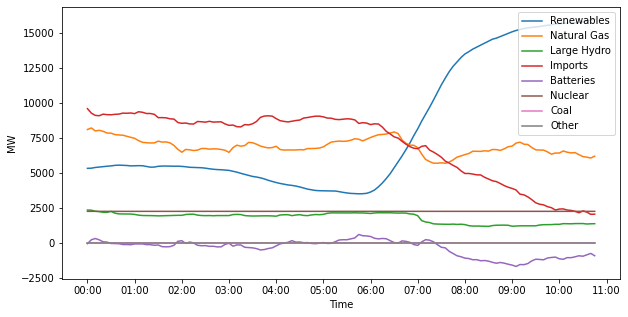

In [85]:
%matplotlib inline 
plt.figure(figsize = (10, 5))
plt.plot(df['DateTime'], df['Renewables'], label = 'Renewables')
plt.plot(df['DateTime'], df['Natural Gas'], label = 'Natural Gas')
plt.plot(df['DateTime'], df['Large Hydro'], label = 'Large Hydro')
plt.plot(df['DateTime'], df['Imports'], label = 'Imports')
plt.plot(df['DateTime'], df['Batteries'], label = 'Batteries')
plt.plot(df['DateTime'], df['Nuclear'], label = 'Nuclear')
plt.plot(df['DateTime'], df['Coal'], label = 'Coal')
plt.plot(df['DateTime'], df['Other'], label = 'Other')
plt.xlabel('Time')
plt.ylabel('MW')

dtFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(dtFmt)

plt.legend();

## Getting Historical and Forecasted Data from Oasis API

In [9]:
# Utilitize old cold written for LMP for reference: 
# https://github.com/mianakajima/caiso_analysis/blob/main/src/oasis_api/oasis_api_helpers.py
import zipfile
import xml.etree.ElementTree as ET
import re
import os 

def get_LMP(start_date, end_date, market_run_id = "DAM", node = "DLAP_PGAE-APND"):
    #start_date and end_date of format YYYYMMDD as a string
    LMP_url = f"http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&" \
              f"startdatetime={start_date}T07:00-0000&" \
              f"enddatetime={end_date}T07:00-0000&version=1&" \
              f"market_run_id={market_run_id}&node={node}"

    r = requests.get(LMP_url)

    #change working directory to folder the script is in
    abspath = os.path.abspath(__file__)
    dname = os.path.dirname(abspath)
    os.chdir(dname)
    # print(os.getcwd())
    # os.chdir('/Users/mnakajim/Documents/Github/caiso_analysis/src/oasis_api')

    #extract zipfile
    with open('./temp_zip.zip', 'wb') as code:
        code.write(r.content)

    with zipfile.ZipFile('./temp_zip.zip', 'r') as zip_ref:
        zip_ref.extractall('./download_data')


    #get name of XML file
    header_filename = r.headers['Content-Disposition']
    zip_file = re.sub('inline; filename=', '', header_filename)
    xml_file = re.sub('.zip;', '.xml', zip_file)
    os.remove('temp_zip.zip')
    #parse XML file

    xml_data = ET.parse(f"download_data/{xml_file}")
    root = xml_data.getroot()

    #extract values of interest
    values = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}VALUE')]
    interval_start = [repdata.text for repdata in
                      root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}INTERVAL_START_GMT')]
    interval_end = [repdata.text for repdata in
                    root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}INTERVAL_END_GMT')]
    interval_num = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}INTERVAL_NUM')]
    opr_date = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}OPR_DATE')]
    resource_name = [repdata.text for repdata in
                     root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}RESOURCE_NAME')]

    lmp_df = pd.DataFrame({'opr_date': opr_date,
                        'interval_start': interval_start,
                        'interval_end': interval_end,
                        'interval_num': interval_num,
                        'resource_name': resource_name,
                        'value': values})

    #convert to correct data types
    lmp_df[['interval_num', 'value']] = lmp_df[['interval_num', 'value']].apply(pd.to_numeric)
    lmp_df[['opr_date', 'interval_start', 'interval_end']] = lmp_df[
        ['opr_date', 'interval_start', 'interval_end']].apply(pd.to_datetime)

    return(lmp_df)

In [114]:
# Renewable Forecast Payload 
start_date = "20220705"
end_date = "20220706"
market_run_id = "DAM"

#data_item = "SLD_REN_FCST" # This is just renewables - solar + wind (what is forecasted and also actual) 
#data_item = "ISO_TOT_GEN_MW" # This is the generation (there are also forecasts for next day) 

data_item = "SLD_FCST" # This is the demand forecasted (so how much customers need) 

renewable_url = f"http://oasis.caiso.com/oasisapi/SingleZip?queryname={data_item}&" \
              f"startdatetime={start_date}T07:00-0000&" \
              f"enddatetime={end_date}T07:00-0000&version=1&" \
              f"market_run_id={market_run_id}"

renewable_url

'http://oasis.caiso.com/oasisapi/SingleZip?queryname=SLD_FCST&startdatetime=20220705T07:00-0000&enddatetime=20220706T07:00-0000&version=1&market_run_id=DAM'

In [106]:
# Make request and unzip file 
r = requests.get(renewable_url)
#extract zipfile
with open('./temp_zip.zip', 'wb') as code:
    code.write(r.content)
    
with zipfile.ZipFile('./temp_zip.zip', 'r') as zip_ref:
        zip_ref.extractall('./download_data')


In [107]:
#get name of XML file
header_filename = r.headers['Content-Disposition']
zip_file = re.sub('inline; filename=', '', header_filename)
xml_file = re.sub('.zip;', '.xml', zip_file)
os.remove('temp_zip.zip')
#parse XML file

xml_data = ET.parse(f"download_data/{xml_file}")
root = xml_data.getroot()

In [108]:
# examine tree
[elem.tag for elem in root.iter()][:35]

['{http://www.caiso.com/soa/OASISReport_v1.xsd}OASISReport',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}MessageHeader',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}TimeDate',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}Source',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}Version',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}MessagePayload',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}RTO',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}name',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}REPORT_ITEM',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}REPORT_HEADER',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}SYSTEM',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}TZ',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}REPORT',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}MKT_TYPE',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}EXECUTION_TYPE',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}UOM',
 '{http://www.caiso.com/soa/OASISReport_v1.xsd}INTERVAL',
 '{http://www

In [109]:
# Retreive values 
values = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}VALUE')]
start = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}INTERVAL_START_GMT')]
end = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}INTERVAL_END_GMT')]
#trading_hub = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}TRADING_HUB')]
#ren_type = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}RENEWABLE_TYPE')]
resource_name = [repdata.text for repdata in root.iter('{http://www.caiso.com/soa/OASISReport_v1.xsd}RESOURCE_NAME')]

In [110]:
print(values[:10])
print(start[:10])
print(end[:10])
#print(trading_hub[:10])
#print(ren_type[:10])
print(resource_name[:10])

['1074', '1386.71', '1021.57', '1444.11', '886.96', '1254.22', '1422.63', '1392.59', '805.47', '1222.28']
['2022-07-05T14:00:00-00:00', '2022-07-06T02:00:00-00:00', '2022-07-06T06:00:00-00:00', '2022-07-06T00:00:00-00:00', '2022-07-05T12:00:00-00:00', '2022-07-06T04:00:00-00:00', '2022-07-05T23:00:00-00:00', '2022-07-05T22:00:00-00:00', '2022-07-05T09:00:00-00:00', '2022-07-05T17:00:00-00:00']
['2022-07-05T15:00:00-00:00', '2022-07-06T03:00:00-00:00', '2022-07-06T07:00:00-00:00', '2022-07-06T01:00:00-00:00', '2022-07-05T13:00:00-00:00', '2022-07-06T05:00:00-00:00', '2022-07-06T00:00:00-00:00', '2022-07-05T23:00:00-00:00', '2022-07-05T10:00:00-00:00', '2022-07-05T18:00:00-00:00']
['AVA', 'AVA', 'AVA', 'AVA', 'AVA', 'AVA', 'AVA', 'AVA', 'AVA', 'AVA']


In [111]:
#renewables_df = pd.DataFrame({'start_time': start, 
                             # 'end_time': end, 
                             # 'forecast': values,
                             # 'trading_hub': trading_hub,
                             # 'ren_type': ren_type})

fcst_df = pd.DataFrame({'start_time': start, 
                              'end_time': end, 
                              'forecast': values,
                              'resource': resource_name})

In [113]:
fcst_df.tail()

,start_time,end_time,forecast,resource
691,2022-07-05T08:00:00-00:00,2022-07-05T09:00:00-00:00,54.35,VEA-TAC
692,2022-07-05T10:00:00-00:00,2022-07-05T11:00:00-00:00,51.42,VEA-TAC
693,2022-07-05T18:00:00-00:00,2022-07-05T19:00:00-00:00,76.24,VEA-TAC
694,2022-07-06T02:00:00-00:00,2022-07-06T03:00:00-00:00,93.13,VEA-TAC
695,2022-07-05T21:00:00-00:00,2022-07-05T22:00:00-00:00,90.9,VEA-TAC


In [36]:
renewables_df['start_time'] = pd.to_datetime(renewables_df['start_time'])
renewables_df['end_time'] = pd.to_datetime(renewables_df['end_time'])
renewables_df['forecast'] = [float(num) for num in renewables_df['forecast']]

In [37]:
renewables_df.dtypes

start_time     datetime64[ns, UTC]
end_time       datetime64[ns, UTC]
forecast                   float64
trading_hub                 object
ren_type                    object
dtype: object

In [38]:
renewables_df.head()

,start_time,end_time,forecast,trading_hub,ren_type
0,2022-07-05 07:00:00+00:00,2022-07-05 08:00:00+00:00,0.0,NP15,Solar
1,2022-07-05 08:00:00+00:00,2022-07-05 09:00:00+00:00,0.0,NP15,Solar
2,2022-07-05 09:00:00+00:00,2022-07-05 10:00:00+00:00,0.0,NP15,Solar
3,2022-07-05 10:00:00+00:00,2022-07-05 11:00:00+00:00,0.0,NP15,Solar
4,2022-07-05 11:00:00+00:00,2022-07-05 12:00:00+00:00,0.0,NP15,Solar


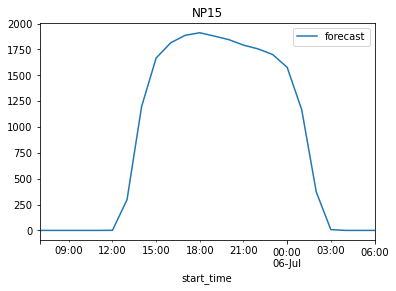

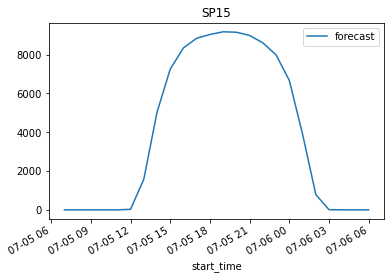

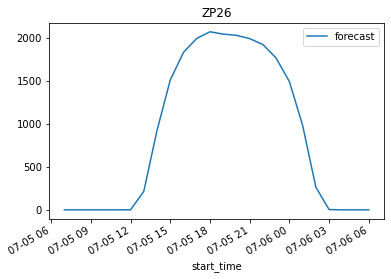

In [104]:
# Plot for each trading hub
for hub in renewables_df.trading_hub.unique():
    solar = renewables_df.loc[(renewables_df.ren_type == "Solar") & (renewables_df.trading_hub == hub)]
    solar.plot(x = 'start_time', y = 'forecast', title = hub)